# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
#import things

import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
import json
from pprint import pprint
from scipy.stats import linregress

#import api keys
from api_keys import weather_api_key

#import API from citypy
from citipy import citipy


## Generate Cities List

In [48]:
#create lists for cities
#need to get latitude/longitude for cities
lat_lng = []
cities = []

#create an array of random numbers, saw that np.random.uniform might give me the best results, given a range from 
#latitude and longitude, used 500 since the HW calls for 500 samples? 
#nevermind, the size needed to be bigger.
lat = np.random.uniform(low=-90.00, high=90.00, size = 1200)
lng = np.random.uniform(low=-180.00, high=180.00, size = 1200)
lat_lng = list(zip(lat, lng))

for i in lat_lng:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

# print(cities)

cities_df = pd.DataFrame({"city": cities})

#create add'l columns for the other things in DF
cities_df['lat'] = ''
cities_df['lng'] = ''
cities_df['Max Temp'] = ''
cities_df['Humidity'] = ''
cities_df['Cloudiness'] = ''
cities_df['Wind Speed'] = ''
cities_df['Country'] = ''
cities_df['Date'] = ''

cities_df.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,touros,,,,,,,,
1,kaeo,,,,,,,,
2,hobart,,,,,,,,
3,port alfred,,,,,,,,
4,odesskoye,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
#create base API url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query = f"{base_url}appid={weather_api_key}&units={units}&q="

#create counts for recrds & sets 
record = 1
set_list = 1

print(f'Beginning Data Retrieval\n'
         f'-----------------------------')

#create 
for index, row in cities_df.iterrows():
       
    city = row['city']
    
    response = requests.get(query + city).json()
   
    print(f'Processing Record {record} of Set {set_list} | {city}')
    
#     if record < 51:
#         record += 1
#         set = 1
#     if record > 50 and record < 101:
#         record = 1
#         record += 1
#         set += 1
    if record <= 49:
        record += 1 
    else:
        record = 1
        set_list += 1
#     while record < 51:
#         record += 1 
#         set = 1
    
    try:
        cities_df.loc[index, 'lat'] = response['coord']['lat']
        cities_df.loc[index, 'lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp']= response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
    
    except (KeyError):
        print("City not found. Skipping...")

print(f'-----------------------------\n'
     f'Data Retrieval Complete\n'
     f'-----------------------------\n')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | kaeo
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | odesskoye
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | sidi bu zayd
City not found. Skipping...
Processing Record 9 of Set 1 | mackay
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | nsanje
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | erenhot
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | saraza
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | te anau
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | cidreira
Processing Record 22 of Set 1 | tanete
Processing Record 23 of Set 

Processing Record 42 of Set 4 | presidencia roque saenz pena
Processing Record 43 of Set 4 | srostki
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | halvad
Processing Record 46 of Set 4 | adrar
Processing Record 47 of Set 4 | taybad
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | andselv
City not found. Skipping...
Processing Record 50 of Set 4 | nizhnyaya omka
Processing Record 1 of Set 5 | abnub
Processing Record 2 of Set 5 | sweetwater
Processing Record 3 of Set 5 | fevralsk
City not found. Skipping...
Processing Record 4 of Set 5 | lazaro cardenas
Processing Record 5 of Set 5 | taonan
Processing Record 6 of Set 5 | pavlogradka
Processing Record 7 of Set 5 | chinsali
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 | pisco
Processing Record 10 of Set 5 | khonuu
City not found. Skipping...
Processing Record 11 of Set 5 | cayenne
Processing Record 12 of Set 5 | vardo
Processing Record 13 of Set 5 | ayagoz
Processing Reco

Processing Record 27 of Set 8 | saint anthony
Processing Record 28 of Set 8 | acapulco
Processing Record 29 of Set 8 | asfi
Processing Record 30 of Set 8 | agogo
Processing Record 31 of Set 8 | kuala terengganu
Processing Record 32 of Set 8 | ust-nera
Processing Record 33 of Set 8 | chino valley
Processing Record 34 of Set 8 | ulladulla
Processing Record 35 of Set 8 | desterro
Processing Record 36 of Set 8 | ranong
Processing Record 37 of Set 8 | masunga
Processing Record 38 of Set 8 | nizhniy kuranakh
Processing Record 39 of Set 8 | chapais
Processing Record 40 of Set 8 | bafoulabe
Processing Record 41 of Set 8 | okhotsk
Processing Record 42 of Set 8 | burnie
Processing Record 43 of Set 8 | batagay-alyta
Processing Record 44 of Set 8 | junagarh
Processing Record 45 of Set 8 | lincoln
Processing Record 46 of Set 8 | novoagansk
Processing Record 47 of Set 8 | novo aripuana
Processing Record 48 of Set 8 | mugur-aksy
Processing Record 49 of Set 8 | ginda
Processing Record 50 of Set 8 | pe

In [50]:
#homework example 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
cities_df.to_csv("WeatherPy.csv", index=False)

cities_df.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,touros,-5.2,-35.46,75.2,83,20,4.7,BR,1600299609
1,kaeo,-35.1,173.78,63.88,60,6,8.48,NZ,1600299610
2,hobart,-42.88,147.33,50,61,20,9.17,AU,1600299398
3,port alfred,-33.59,26.89,58.98,75,11,16.93,ZA,1600299492
4,odesskoye,54.21,72.97,48.85,57,32,16.42,RU,1600299610


In [71]:
summary_stats = cities_df[['lat', 'lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]

# perc = [.25, .5, .75]

# #include certain dtypes
# include = ['object', 'float', 'int']

# summary_stats.describe(percentiles = perc, include = include)

count = summary_stats.count()

print(count)

mean = summary_stats.mean(axis=0)
#okay so we can see here that the mean has no values

#check to see what type of data is in the DF, all object, will need to convert
summary_stats.dtypes

#alright, i guess we'll need ot convert each column to numeric, will see if there's an easier way later 
#latitude
lat = pd.to_numeric(summary_stats['lat'])
lat_stat = lat.describe()
print(lat_stat)

#longitude
lng = pd.to_numeric(summary_stats['lng'])
lng_stat = lng.describe()
print(lng_stat)

#max temp
mxtemp = pd.to_numeric(summary_stats['Max Temp'])
mxtemp_stat = mxtemp.describe()
print(mxtemp_stat)

#humidity
hum = pd.to_numeric(summary_stats['Humidity'])
hum_stat = hum.describe()
print(hum_stat)

#cloudiness
cloud = pd.to_numeric(summary_stats['Cloudiness'])
cloud_stat = cloud.describe()
print(cloud_stat)

#wind speed
wind = pd.to_numeric(summary_stats['Wind Speed'])
wind_stat = wind.describe()
print(wind_stat)

#date
date = pd.to_numeric(summary_stats['Date'])
date_stat = date.describe()
print(date_stat)


# df1 = pd.concat([lat_stat, lng_stat], axis = 1)
# df2 = pd.concat([mxtemp_stat, hum_stat], axis = 1)
# df3 = pd.concat([cloud_stat, wind_stat], axis = 1)

# df1

pd.DataFrame({'lat': lat_stat,
             'lng': lng_stat,
             'Max Temp': mxtemp_stat,
             'Humidity': hum_stat,
             'Cloudiness': cloud_stat,
             'Wind Speed': wind_stat,
             'Date': date_stat})



lat           538
lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Date          538
dtype: int64
count    493.000000
mean      19.863976
std       34.476417
min      -54.800000
25%       -8.930000
50%       22.570000
75%       50.680000
max       78.220000
Name: lat, dtype: float64
count    493.000000
mean      22.046308
std       89.979679
min     -175.200000
25%      -56.620000
50%       26.160000
75%      102.270000
max      179.320000
Name: lng, dtype: float64
count    493.000000
mean      64.932718
std       15.316696
min       16.050000
25%       51.010000
50%       66.200000
75%       78.120000
max      102.990000
Name: Max Temp, dtype: float64
count    493.000000
mean      72.711968
std       20.297337
min        7.000000
25%       64.000000
50%       78.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64
count    493.000000
mean      53.537525
std       38.064039
min        0.000000
25%       12.000000
50%    

,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02
mean,19.863976,22.046308,64.932718,72.711968,53.537525,8.315335,1.600300e+09
std,34.476417,89.979679,15.316696,20.297337,38.064039,5.456085,7.783462e+01
min,-54.800000,-175.200000,16.050000,7.000000,0.000000,0.340000,1.600299e+09
25%,-8.930000,-56.620000,51.010000,64.000000,12.000000,4.000000,1.600300e+09
50%,22.570000,26.160000,66.200000,78.000000,63.000000,7.000000,1.600300e+09
75%,50.680000,102.270000,78.120000,87.000000,90.000000,11.410000,1.600300e+09
max,78.220000,179.320000,102.990000,100.000000,100.000000,32.010000,1.600300e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [72]:
cities_df.dtypes

# humid = pd.to_numeric(cities_df['Humidity'])

# data = humid > 100

# wayhumid = humid.loc[humid > 100]

# print(wayhumid)

# print(data)

#i guess there isn't any cities that have humidity over 100%

#check datatype of column
cities_df['Humidity'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Humidity'])

#set these to variables to make it easier 
humid = pd.to_numeric(cities_df['Humidity']) 


#set this to a df
hdf = pd.DataFrame({"City": cities,
             'Humidity': humid})

hdf.head()

#gather all of the humidity above 100
omg = hdf[hdf['Humidity'] > 100]

omg

#i guess there isn't any cities that have humidity over 100%

,City,Humidity


In [73]:
#  Get the indices of cities that have humidity over 100%.


In [74]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

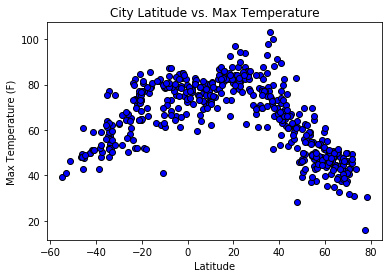

In [75]:
#check dataype of column
cities_df['Max Temp'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Max Temp'])
pd.to_numeric(cities_df['lat'])

#start plotting by getting the values
maxtemp = pd.to_numeric(cities_df['Max Temp'])
latitude = pd.to_numeric(cities_df['lat'])

plt.scatter(latitude, maxtemp, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')

plt.savefig('CityLatvsMaxTemp')


## Latitude vs. Humidity Plot

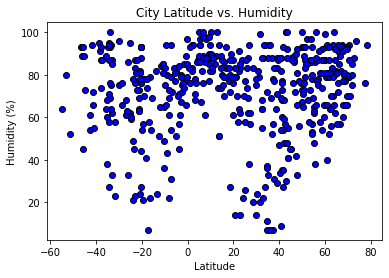

In [76]:
#check datatype of column
cities_df['lat'].dtype
cities_df['Humidity'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['lat'])
pd.to_numeric(cities_df['Humidity'])

#start plotting by getting the values
lats = pd.to_numeric(cities_df['lat'])
humidity = pd.to_numeric(cities_df['Humidity'])

plt.scatter(lats, humidity, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

plt.savefig('CityLatvsHumidity')

## Latitude vs. Cloudiness Plot

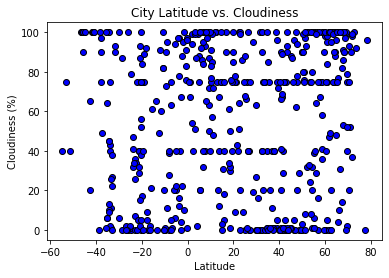

In [77]:
#check datatype of column
cities_df['lat'].dtype
cities_df['Cloudiness'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['lat'])
pd.to_numeric(cities_df['Cloudiness'])

#start plotting by getting the values
lat = pd.to_numeric(cities_df['lat'])
cloudiness = pd.to_numeric(cities_df['Cloudiness'])

plt.scatter(lat, cloudiness, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

plt.savefig('CityLatvsCloudiness')

## Latitude vs. Wind Speed Plot

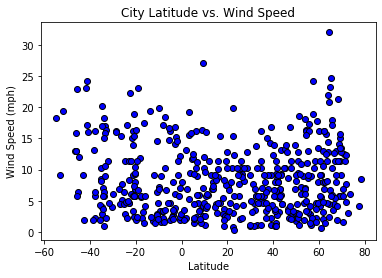

In [78]:
#check datatype of column
cities_df['lat'].dtype
cities_df['Wind Speed'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['lat'])
pd.to_numeric(cities_df['Wind Speed'])

#start plotting by getting the values
lat = pd.to_numeric(cities_df['lat'])
windsp = pd.to_numeric(cities_df['Wind Speed'])

plt.scatter(lat, windsp, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')

plt.savefig('CityLatvsWindSpeed')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6618808992833386


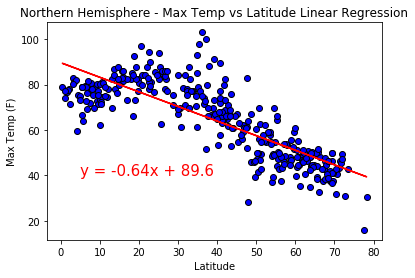

In [79]:
#check datatype of column
cities_df['Max Temp'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Max Temp'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
maxtemp = pd.to_numeric(cities_df['Max Temp']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"max temp": maxtemp,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
north = new[new['latitude'] > 0]

north['max temp'].dtype

plt.scatter(north['latitude'], north['max temp'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['latitude'], north['max temp'])

#calculate predictions for each latitude
regress_values = north['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(north['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (5, 40), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('NHMaxTempvsLatitude')


The relationship between the Northern Hemisphere and the Max Temperature is a negative correlation. As the equator line moves further north, the maximum temperature starts to fall. It is interesting to also see the outliers on both ends of the regression line for that day. As the equator moves up north, the outliers actually start going under the line instead of above the line. We can see because the line has a slope, there is a linear relationship between the two, which is further confirmed by the r-value as well, which is close to 1.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5488448145728442


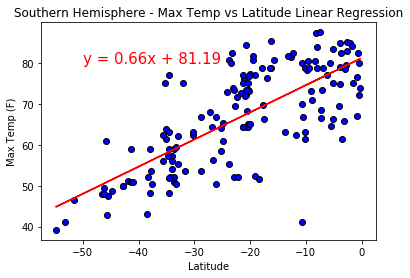

In [80]:
#check datatype of column
cities_df['Max Temp'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Max Temp'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
maxtemp = pd.to_numeric(cities_df['Max Temp']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"max temp": maxtemp,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
south = new[new['latitude'] < 0]

south['max temp'].dtype

plt.scatter(south['latitude'], south['max temp'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['latitude'], south['max temp'])

#calculate predictions for each latitude
regress_values = south['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(south['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('SHMaxTempvsLatitude')

Conversely, in the Southern Hemisphere, we can see that there is a general progression of maximum temperatures as the line of the equation moves closer to 0 degress latitude. Here, we can also see there is a linear relationship as well. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00025159112875902575


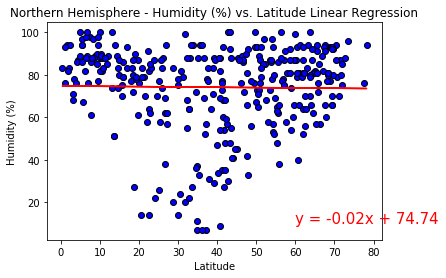

In [81]:
#check datatype of column
cities_df['Humidity'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Humidity'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
humidity = pd.to_numeric(cities_df['Humidity']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"Humidity": humidity,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
north = new[new['latitude'] > 0]

north['Humidity'].dtype

plt.scatter(north['latitude'], north['Humidity'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['latitude'], north['Humidity'])

#calculate predictions for each latitude
regress_values = north['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(north['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (60, 10), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('NHHumidityvsLatitude')

Based on the data and scatterplot, we can see that the humidity levels and the latitude location are all over the place. There isn't much of a slope on the linear regression, and the r-value is low, meaning the likelihood of a relationship between the two values is low or non-existent. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006153056465522961


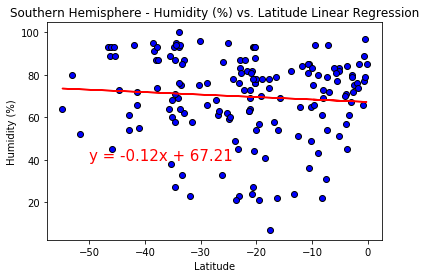

In [82]:
#check datatype of column
cities_df['Humidity'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Humidity'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
humidity = pd.to_numeric(cities_df['Humidity']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"Humidity": humidity,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
south = new[new['latitude'] < 0]

south['Humidity'].dtype

plt.scatter(south['latitude'], south['Humidity'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['latitude'], south['Humidity'])

#calculate predictions for each latitude
regress_values = south['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(south['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (-50, 40), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('SHHumidityvsLatitude')

In this plot, we can see that there's more of a correlation between humidity levels and the latitude as it rises from the Southern Hemisphere to the equator. We can see less of a spread of data when the latitude gets closer to the equator. While low, the r-value when compared to the Northern Hemisphere, is higher in value. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0007373200528098582


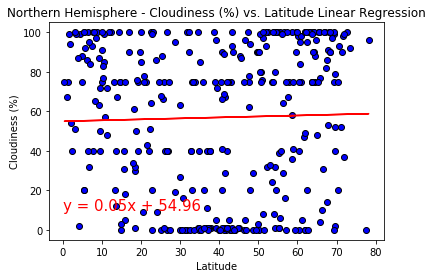

In [83]:
#check datatype of column
cities_df['Cloudiness'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Cloudiness'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
cloud = pd.to_numeric(cities_df['Cloudiness']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"Cloudiness": cloud,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
north = new[new['latitude'] > 0]

north['Cloudiness'].dtype

plt.scatter(north['latitude'], north['Cloudiness'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['latitude'], north['Cloudiness'])

#calculate predictions for each latitude
regress_values = north['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(north['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (0, 10), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('NHCloudinessvsLatitude')

When observing the data between the latitude progression from the equator to the North Pole and the percentage of cloudiness, we can see that there is not a lot of correlation between the two. This suggests that there might not be a direct relationship between the city location and how cloudy it might be that day. There could be several factors that may affect this above the latitudinal location - inclement weather, seasons, all which have a more direct effect on cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.023375782809326884


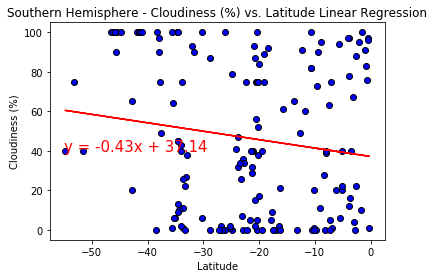

In [84]:
#check datatype of column
cities_df['Cloudiness'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Cloudiness'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
cloud = pd.to_numeric(cities_df['Cloudiness']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"Cloudiness": cloud,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
south = new[new['latitude'] < 0]

south['Cloudiness'].dtype

plt.scatter(south['latitude'], south['Cloudiness'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['latitude'], south['Cloudiness'])

#calculate predictions for each latitude
regress_values = south['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(south['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (-55, 40), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('SHCloudinessvsLatitude')

This is very similar when comparing North and South and Cloudiness. With the Southern Hemisphere, there seems to be a more defined relationship than the Northern Hemisphere. It might be because when moving closer to the equator, temperatures tend to be much more humid, which can affect rain and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.025491231909365256


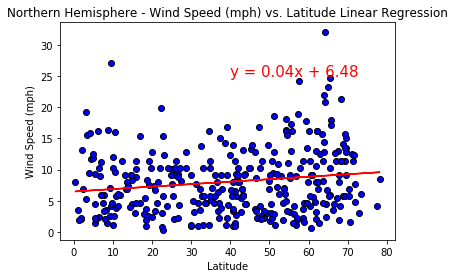

In [85]:
#check datatype of column
cities_df['Wind Speed'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Wind Speed'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
wind = pd.to_numeric(cities_df['Wind Speed']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"Wind Speed": wind,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
north = new[new['latitude'] > 0]

north['Wind Speed'].dtype

plt.scatter(north['latitude'], north['Wind Speed'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['latitude'], north['Wind Speed'])

#calculate predictions for each latitude
regress_values = north['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(north['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (40, 25), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('NHWindSpeedvsLatitude')

We can see from this plot that the majority of the data seems to stay in a low wind speed, regardless of the latitudinal location of the cities. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06474870728391571


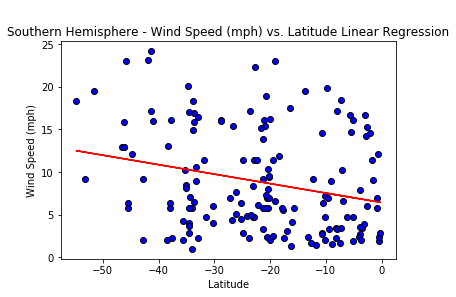

In [86]:
#check datatype of column
cities_df['Wind Speed'].dtype
cities_df['lat'].dtype

#since it is a string, change to numeric values
pd.to_numeric(cities_df['Wind Speed'])
pd.to_numeric(cities_df['lat'])

#set these to variables to make it easier 
wind = pd.to_numeric(cities_df['Wind Speed']) 
lat = pd.to_numeric(cities_df['lat'])

#set this to a df
new = pd.DataFrame({"Wind Speed": wind,
             'latitude': lat})

#gather all of the latitudues above 0 to get the northern hemisphere
south = new[new['latitude'] < 0]

south['Wind Speed'].dtype

plt.scatter(south['latitude'], south['Wind Speed'], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

#create linear regression

#run regression and store each value of returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['latitude'], south['Wind Speed'])

#calculate predictions for each latitude
regress_values = south['latitude'] * slope + intercept

#create linear equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression 
plt.plot(south['latitude'], regress_values, 'red')

#add equation to plot 
plt.annotate(line_eq, (-50, 28), fontsize=15, color="red")

#calculate r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('SHWindSpeedvsLatitude')

In this plot, we can see there seems to be more data that is not clustered around the linear regression line and around each other. Similar to the Northern Hemisphere, there does not seem to have a direct relationship between wind speed and latitudinal location moving closer to the equator, but the r value is more than twice the value of the r-value belonging to the N. Hemisphere. This may suggest that there is more of a relationship of windspeed moving closer to the equator, than moving away from the equator.